In [1]:
# I created this code to look at the number of travellers in USA for 2019, 2020 & 2021
# I used data from TSA websites and plotted a graph to see the trend
# Also, the code output showed the min and max travellers with their dates

In [2]:
import pandas as pd
from IPython.core.display import display, HTML
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
tsa_2 = "https://www.tsa.gov/coronavirus/passenger-throughput?page=0" # to put the tables from TSA website
tsa_1 = "https://www.tsa.gov/coronavirus/passenger-throughput?page=1"

#https://www.freecodecamp.org/news/how-to-create-auto-updating-data-visualizations-in-python-with-matplotlib-and-aws/

In [4]:
print(len(tsa_1)) # to find the length of the tables
print(len(tsa_2))

59
59


In [5]:
r_1 = requests.get(tsa_1)

tsa_tables_1 = pd.read_html(r_1.text, header=0) # to put the tables into pandas form

r_2 = requests.get(tsa_2)

tsa_tables_2 = pd.read_html(r_2.text, header=0) # to put the tables into pandas form

In [6]:
tsa1 = tsa_tables_1[0]
tsa2 = tsa_tables_2[0]  #to get the tables and store them here

In [7]:
tsa2.head() # to display the first 5 index

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,2/1/2021,628989.0,2054725,2078169
1,1/31/2021,859039.0,1948138,1938817
2,1/30/2021,617489.0,1658886,1593697
3,1/29/2021,774688.0,2159047,1534386
4,1/28/2021,750558.0,2085468,1862420


In [8]:
len(tsa1) # to find out the length of this table

138

In [9]:
len(tsa2) # to find out the length of this table

200

In [10]:
tsa = pd.concat([tsa2, tsa1], ignore_index=True) #to combine both dataframes

In [11]:
tsa.head(200) # to display all the rows in combined data frame

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,2/1/2021,628989.0,2054725,2078169
1,1/31/2021,859039.0,1948138,1938817
2,1/30/2021,617489.0,1658886,1593697
3,1/29/2021,774688.0,2159047,1534386
4,1/28/2021,750558.0,2085468,1862420
...,...,...,...,...
195,7/21/2020,NaN,530421,2499460
196,7/20/2020,NaN,695330,2635312
197,7/19/2020,NaN,747422,2727355
198,7/18/2020,NaN,646654,2396462


In [12]:
tsa.tail(70) # to display all the rows in combined data frame from the bottom

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
268,5/9/2020,NaN,169580,1985942
269,5/8/2020,NaN,215444,2602631
270,5/7/2020,NaN,190863,2555342
271,5/6/2020,NaN,140409,2270662
272,5/5/2020,NaN,130601,2106597
...,...,...,...,...
333,3/5/2020,NaN,2130015,2402692
334,3/4/2020,NaN,1877401,2143619
335,3/3/2020,NaN,1736393,1979558
336,3/2/2020,NaN,2089641,2257920


In [13]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      338 non-null    object 
 1   2021 Traveler Throughput  32 non-null     float64
 2   2020 Traveler Throughput  338 non-null    int64  
 3   2019 Traveler Throughput  338 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 10.7+ KB


In [14]:
tsa['Date'] = pd.to_datetime(tsa['Date']) # to convert the date into Dtype date

In [15]:
tsa.columns = ['Date','2021','2020','2019'] # to rename the columns

In [16]:
tsa.set_index('Date', inplace=True) # to make the Date as Index

In [17]:
tsa = tsa.astype({"2021":'float',"2020":'float', "2019":'float'})# This will change the Dtype but not the scale format on y-axis on graph

In [18]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2021-02-01 to 2020-03-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2021    32 non-null     float64
 1   2020    338 non-null    float64
 2   2019    338 non-null    float64
dtypes: float64(3)
memory usage: 10.6 KB


In [52]:
# this loop is to find the minimum number of travellers in a given year. 
min1 = []
for m in tsa.columns:
    min1 = tsa.describe(include='all').loc['min'][m] # this is to find the minimum number of travellers for that year
    date1 = tsa.loc[tsa[m] == min1].index[0].strftime('%B') # this will show the month 
    print(f'In the year {m}, the minimum number of travellers are {"{:,}".format(min1)} and it happened in {date1}.')

In the year 2021, the minimum number of travellers are 468,933.0 and it happened in January.
In the year 2020, the minimum number of travellers are 87,534.0 and it happened in April.
In the year 2019, the minimum number of travellers are 1,534,386.0 and it happened in January.


In [55]:
# for the exact date in 2021 which has the least number of travellers 
# couldn't really do for 2020 and 2019 as the date column shows all 3 years

date1 = tsa.loc[tsa['2021'] == 468933].index[0].strftime('%d %B %Y') 
date1

'26 January 2021'

In [54]:
# this loop is to find the maximum number of travellers in a given year. 
max1 = []
for ma in tsa.columns:
    max1 = tsa.describe(include='all').loc['max'][ma] # this is to find the maximum number of travellers for that year
    date11 = tsa.loc[tsa[ma] == max1].index[0].strftime('%B') # this will show the month 
    print(f'In the year {ma}, the maximum number of travellers are {"{:,}".format(max1)} and it happened in {date1}.')

In the year 2021, the maximum number of travellers are 1,327,289.0 and it happened in January.
In the year 2020, the maximum number of travellers are 2,422,272.0 and it happened in January.
In the year 2019, the maximum number of travellers are 2,882,915.0 and it happened in January.


In [49]:
# for the exact date in 2021 which has the most number of travellers 
# couldn't really do for 2020 and 2019 as the date column shows all 3 years

date11 = tsa.loc[tsa['2020'] == 2422272.0].index[0].strftime('%d %B %Y')
date11

'03 January 2021'

In [67]:
mean1 = []
for me in tsa.columns:
    mean1 = tsa.describe(include='all').loc['mean'][me]
    print(f'In the year {me}, the mean number of travellers are {"{:,.2f}".format(mean1)}.')

In the year 2021, the mean number of travellers are 757,100.59.
In the year 2020, the mean number of travellers are 785,613.95.
In the year 2019, the mean number of travellers are 2,329,380.02.


Text(0, 0.5, 'Number of travellers (million)')

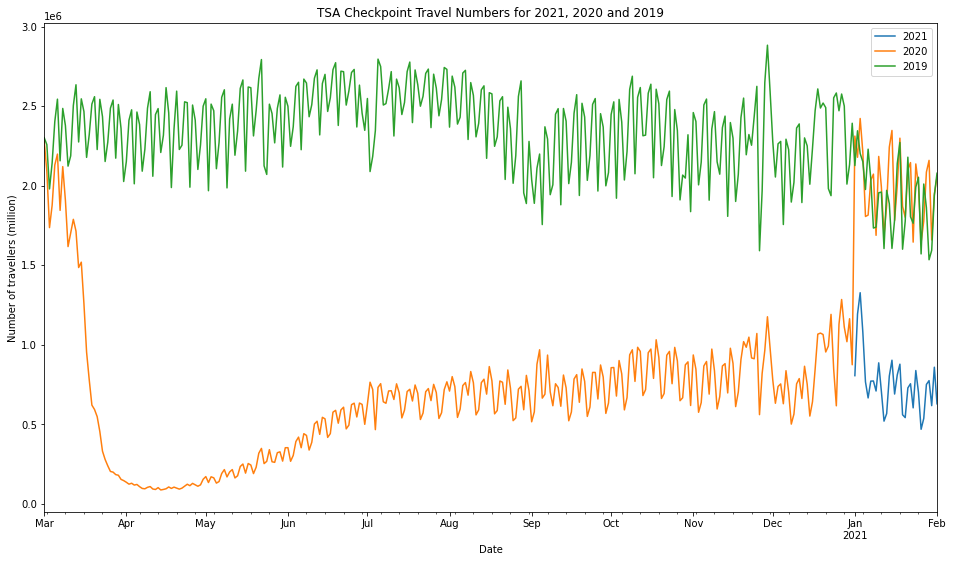

In [22]:
tsa.plot(figsize=(16, 9))
plt.title('TSA Checkpoint Travel Numbers for 2021, 2020 and 2019')
plt.xlabel('Date')
plt.ylabel('Number of travellers (million)')

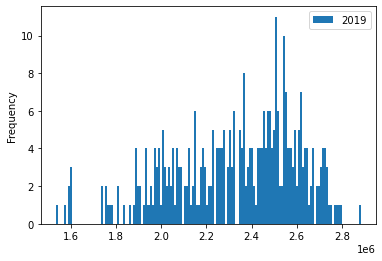

In [23]:
tsa.plot(kind='hist', y='2019', bins=150)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  87534.  ,  143441.62,  199349.24,  255256.86,  311164.48,
         367072.1 ,  422979.72,  478887.34,  534794.96,  590702.58,
         646610.2 ,  702517.82,  758425.44,  814333.06,  870240.68,
         926148.3 ,  982055.92, 1037963.54, 1093871.16, 1149778.78,
        1205686.4 , 1261594.02, 1317501.64, 1373409.26, 1429316.88,
        1485224.5 , 1541132.12, 1597039.74, 1652947.36, 1708854.98,
        1764762.6 , 1820670.22, 1876577.84, 1932485.46, 1988393.08,
        2044300.7 , 2100208.32, 2156115.94, 2212023.56, 2267931.18,
        2323838.8 , 2379746.42, 2435654.04, 2491561.66, 2547469.28,
        2603376.9 , 2659284.52, 2715192.14, 2771099.76, 2827007.38,
        2882915.  ]),
 <a list of 338 Lists of Patches objects>)

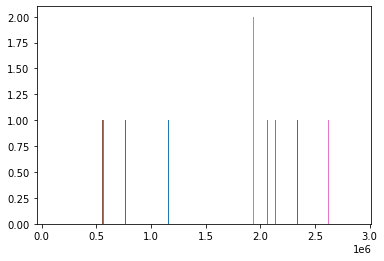

In [24]:
plt.hist(tsa, bins = 50)